##**Project 1: General EDA**

**a. Data Cleaning**

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/Global_Superstore.csv", encoding='ISO-8859-1')

# Check initial data
print(df.isnull().sum())

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # or df.dropna()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove commas, convert to float
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now safely compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


**b. Statistical Analysis**

In [4]:
# Summary statistics
print(df.describe())

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  28949.000000  2.894900e+04  28949.000000  28949.000000  28949.000000   
mean   21948.486614  5.519038e+04    100.203369      3.025389      0.090520   
std    15054.223873  1.358445e-08    100.224363      1.866765      0.157232   
min        1.000000  5.519038e+04      1.956000      1.000000      0.000000   
25%     9299.000000  5.519038e+04     30.240000      2.000000      0.000000   
50%    19556.000000  5.519038e+04     62.700000      3.000000      0.000000   
75%    29785.000000  5.519038e+04    135.744000      4.000000      0.100000   
max    51290.000000  5.519038e+04    581.250000      9.000000      0.500000   

             Profit  Shipping Cost  
count  28949.000000   28949.000000  
mean      14.289823       9.909052  
std       24.147503      10.716634  
min      -55.125000       0.000000  
25%        1.540000       2.520000  
50%        8.856000       5.920000  
75%       24.570000      13.1

**c. Data Visualization**

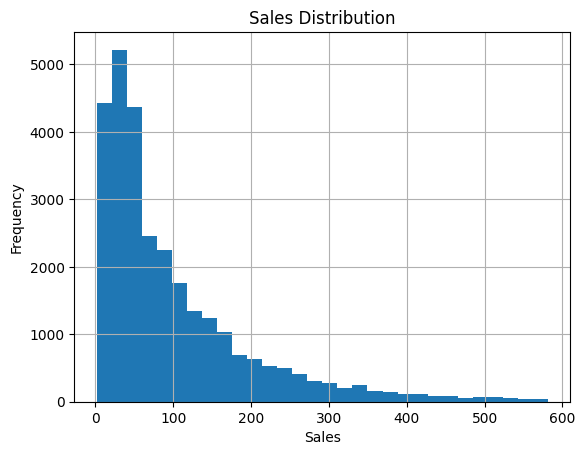

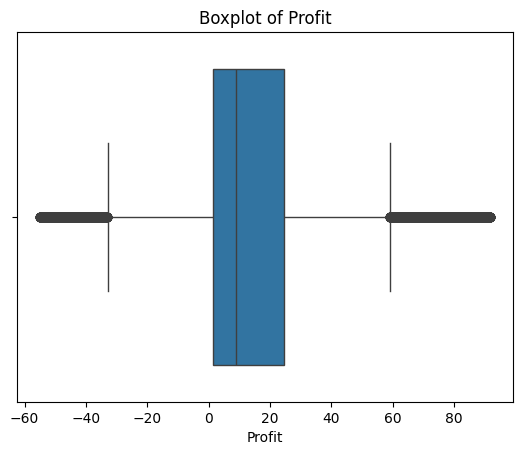

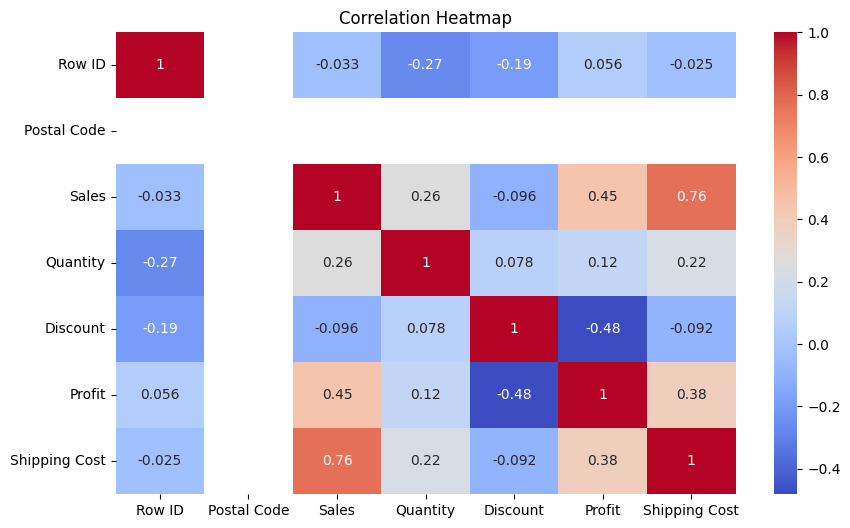

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df['Sales'].hist(bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df['Profit'])
plt.title("Boxplot of Profit")
plt.show()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##**Project 2: Sales Performance Analysis**

**a. Load and Explore**

In [6]:
df = pd.read_csv('/content/Global_Superstore.csv', encoding='ISO-8859-1')
print(df.shape)
print(df.dtypes)
print("**********")
print(df.isnull().sum())

(51290, 24)
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object
**********
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Pro

**b. Data Cleaning**

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert Date column
df['Date'] = pd.to_datetime(df['Ship Date'])

/tmp/ipython-input-7-1265678152.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Ship Date'])


**c. Exploratory Data Analysis**

/tmp/ipython-input-8-2443936003.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Date')['Sales'].resample('M').sum().plot()


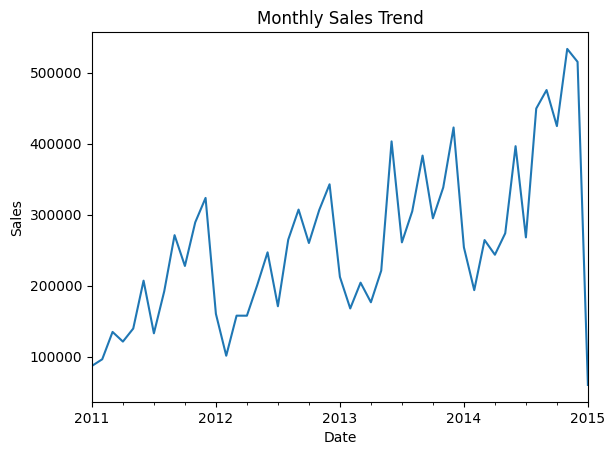

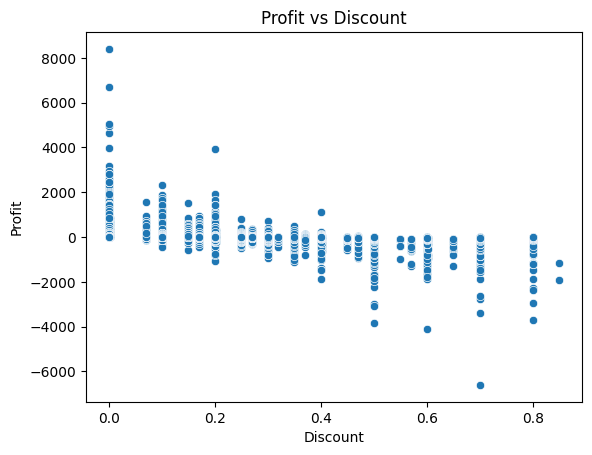

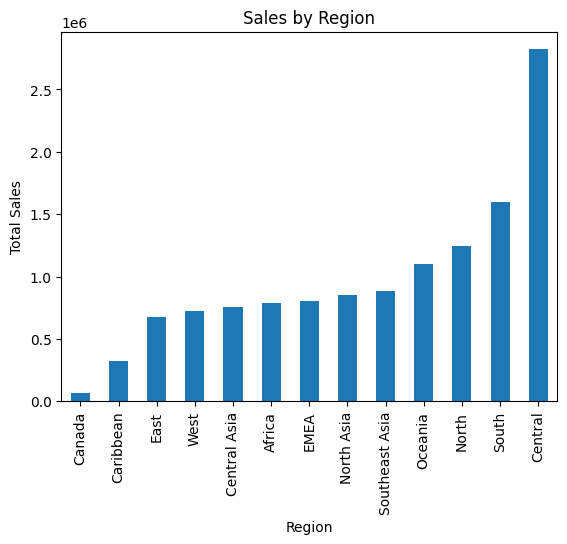

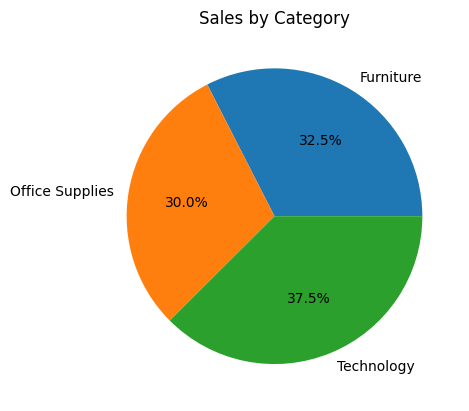

In [8]:
# Time series plot
df.set_index('Date')['Sales'].resample('M').sum().plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Profit vs Discount scatter
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Profit vs Discount")
plt.show()

# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel("Total Sales")
plt.show()

# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.ylabel("")
plt.show()

**d. Predictive Modeling**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.16090406163840787
Mean Squared Error: 187787.80150462044


**3. Insights and Recommendations**

From the analysis, I had the follwing observations:
1. Higher discounts tend to reduce profit, meaning large discounts may not always be beneficial. Limiting discounts to around 10–15% could help maintain better profitability.
2. Sales across regions showed that the East and West performed better than the North and South, so efforts like promotions or better logistics can be focused more on weaker regions.
3. Among product categories, Technology had the highest sales and profit, while Furniture and Office Supplies were less profitable. This suggests promoting high-margin categories and improving pricing strategies for others.
4. Sales showed a spike in March and May, indicating possible seasonal demand. Planning inventory and campaigns ahead of these months can help boost performance.

In conclusion, focusing on discount control, strong regions, high-performing categories, and seasonal trends can improve sales and profits.